In [70]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

h = 0.1
n = 100
n = 1000
n = 10000
n = 100000

n = 100000 h = 0.1 y(x) = x(x+1)
Time taken by Mid-point method: 44.57426071166992
Average percentage error of Mid-point method: 3.07967864741146e-11


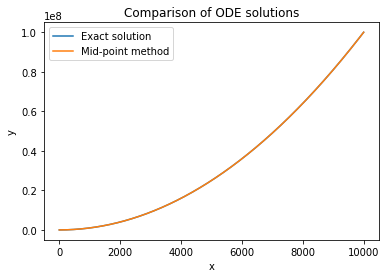

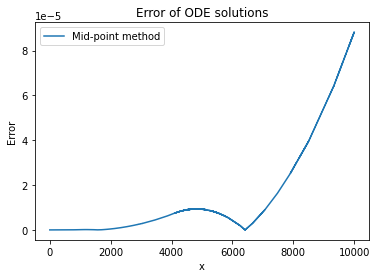

In [19]:
# First-order ODE
# Define the exact solution
def exact_solution(x):
    return x*(x+1)

# Define the derivative function
def deriv_func(x, y):
    return 2*x+1

# Define the Mid-point method
def mid_point(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0]
    for i in range(n):
        k1 = deriv_func(x, y)
        k2 = deriv_func(x + h/2, y + (h/2)*k1)
        y = y + h*k2
        x = x + h
        y_list.append(y)
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = 0

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Mid-point method solution and time
y_midpoint, t_midpoint = mid_point(deriv_func, x0, y0, h, n)
# Calculate the tolerance values
tol_midpoint = np.abs(y_midpoint - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_midpoint, label='Mid-point method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_midpoint, label='Mid-point method')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = x(x+1)')
print('Time taken by Mid-point method:', t_midpoint)

APE_midpoint = np.mean(np.abs(tol_midpoint/y_exact)[1:])*100

# Print the results
print('Average percentage error of Mid-point method:', APE_midpoint)

n = 1000 h = 0.1 y(x) = 0.5*(3*sin(x) - x*cos(x))
Time taken by Mid-point method: 7.00688362121582
Average percentage error of Mid-point method: 50.686505652966304


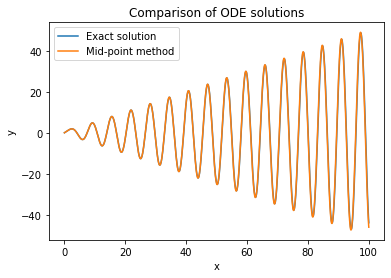

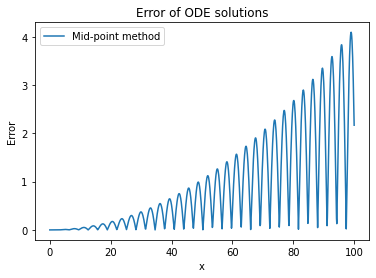

In [54]:
# Define the exact solution
def exact_solution(x):
    return 0.5*(3*np.sin(x) - x*np.cos(x))

# Define the derivative function
def deriv_func(x, y):
    return np.array([y[1], np.sin(x) - y[0]])

# Define the Mid-point method
def mid_point(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0]
    for i in range(n):
        k1 = deriv_func(x, y)
        k2 = deriv_func(x+0.5*h, y+0.5*h*k1)
        y = y + h*k2
        x = x + h
        y_list.append(y)
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([0, 1])

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Mid-point method solution and time
y_midpoint, t_midpoint = mid_point(deriv_func, x0, y0, h, n)

# Calculate the tolerance values
tol_midpoint = np.abs(y_midpoint[:, 0] - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_midpoint[:, 0], label='Mid-point method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_midpoint, label='Mid-point method')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = 0.5*(3*sin(x) - x*cos(x))')
print('Time taken by Mid-point method:', t_midpoint)

APE_midpoint = np.mean(np.abs(tol_midpoint/y_exact)[1:])*100

# Print the results
print('Average percentage error of Mid-point method:', APE_midpoint)

n = 100000 h = 0.1 y(x) = 2x + 2e^(-x) + 2cos(x) - 3
Time taken by Midpoint method: 752.0153522491455
Average percentage error of Midpoint method: 0.041302013956840786


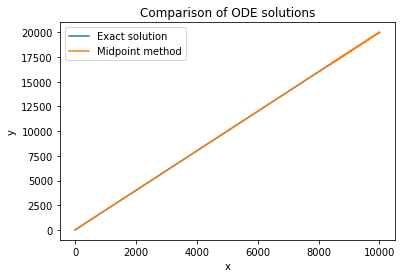

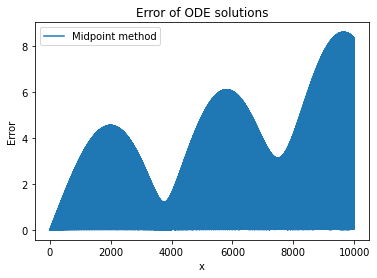

In [63]:
# Define the exact solution
def exact_solution(x):
    return 2*x + 2*np.exp(-x) + 2*np.cos(x) - 3

# Define the derivative function
def deriv_func(x, y):
    return np.array([y[1], y[2], 2*x - 1 - y[0] - y[1] - y[2]])

# Define the midpoint method
def midpoint_method(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0]
    for i in range(n):
        k1 = h*deriv_func(x, y)
        k2 = h*deriv_func(x + h/2, y + k1/2)
        y = y + k2
        x = x + h
        y_list.append(y)
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([1, 0, 0])

# Calculate the exact solution
x_exact = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x_exact)

# Calculate the midpoint method solution and time
y_midpoint, t_midpoint = midpoint_method(deriv_func, x0, y0, h, n)

# Calculate the tolerance values
tol_midpoint = np.abs(y_midpoint[:, 0] - y_exact)

# Plot the results
plt.figure()
plt.plot(x_exact, y_exact, label='Exact solution')
plt.plot(x_exact, y_midpoint[:, 0], label='Midpoint method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x_exact, tol_midpoint, label='Midpoint method')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = 2x + 2e^(-x) + 2cos(x) - 3')
print('Time taken by Midpoint method:', t_midpoint)

APE_midpoint = np.mean(np.abs(tol_midpoint/y_exact)[1:])*100

# Print the results
print('Average percentage error of Midpoint method:', APE_midpoint)


n = 100000 h = 0.1 y(x) = ((x - 1) sin(sqrt(2) x))/sqrt(2) + (x + 1) cos(sqrt(2) x)
Time taken by Midpoint method: 809.7827434539795
Average percentage error of Midpoint method: 16412.98061730689


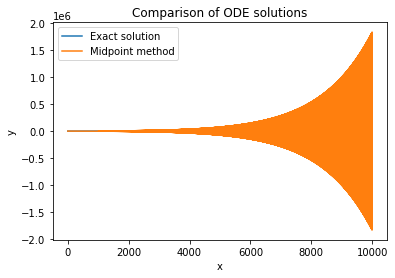

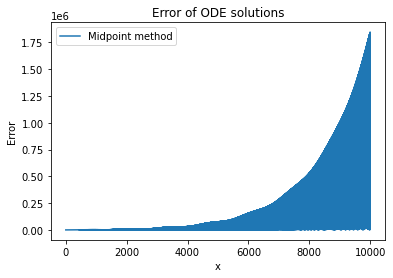

In [71]:
# Define the exact solution
def exact_solution(x):
    return ((x-1)*np.sin(np.sqrt(2)*x))/np.sqrt(2) + (x+1)*np.cos(np.sqrt(2)*x)

# Define the derivative function
def deriv_func(x, y):
    return np.array([y[1], y[2], y[3], -4*y[2] - 4*y[0]])

# Define the midpoint method
def midpoint_method(deriv_func, x0, y0, h, n):
    t0 = time.time()
    x = x0
    y = y0
    y_list = [y0]
    for i in range(n):
        k1 = h*deriv_func(x, y)
        k2 = h*deriv_func(x + h/2, y + k1/2)
        y = y + k2
        x = x + h
        y_list.append(y)
    t1 = time.time()
    return np.array(y_list), (t1-t0)*1000

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([1, 0, 0, -4])

# Calculate the exact solution
x_exact = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x_exact)

# Calculate the midpoint method solution and time
y_midpoint, t_midpoint = midpoint_method(deriv_func, x0, y0, h, n)

# Calculate the tolerance values
tol_midpoint = np.abs(y_midpoint[:, 0] - y_exact)

# Plot the results
plt.figure()
plt.plot(x_exact, y_exact, label='Exact solution')
plt.plot(x_exact, y_midpoint[:, 0], label='Midpoint method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x_exact, tol_midpoint, label='Midpoint method')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = ((x - 1) sin(sqrt(2) x))/sqrt(2) + (x + 1) cos(sqrt(2) x)')
print('Time taken by Midpoint method:', t_midpoint)

APE_midpoint = np.mean(np.abs(tol_midpoint/y_exact)[1:])*100

# Print the results
print('Average percentage error of Midpoint method:', APE_midpoint)
